In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

# 3-Site

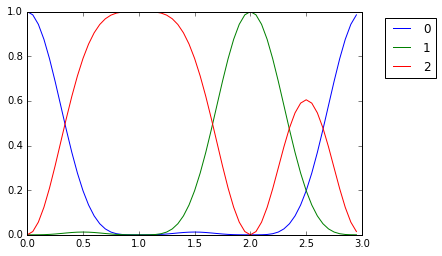

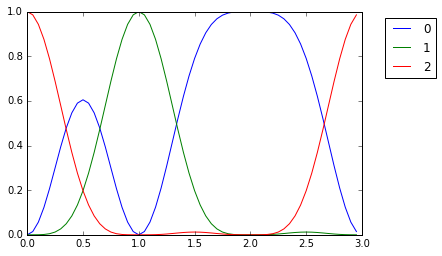

In [31]:
L = 3

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore = np.empty((L, N))
weightback = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore[L-1-j, i] = front - fronthere
        weightback[j, i]     = back  - backhere
        front = fronthere
        back  = backhere
        
for i in range(L):
    plt.plot(np.arange(N)/n,weightfore[i], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.plot(np.arange(N)/n,weightback[i], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 5-Site

In [36]:
L = 5
# Total time elapsed
end = 100
# Time seps per second
n = 5

weightfore5, weightback5 = hm.get_all_weights(L, end, n, here=True, dense = False)

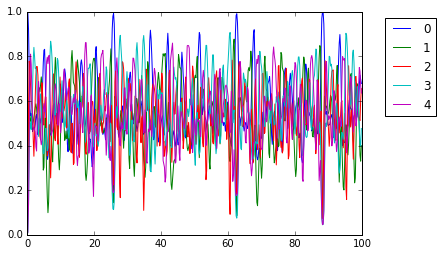

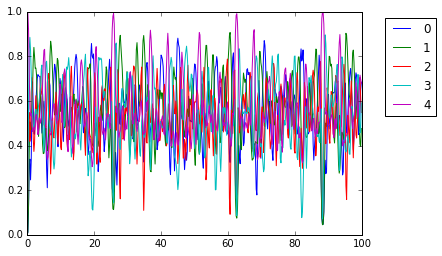

In [39]:
for i in range(L):
    plt.plot(np.arange(end*n)/n,weightfore5[i], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.plot(np.arange(end*n)/n,weightback5[i], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [40]:
print(np.shape(weightback5))
print(np.average(weightfore5[:,25:]))
print(np.average(weightback5[:,25:]))
print(np.average(weightfore5[:,100:]))
print(np.average(weightback5[:,100:]))

(5, 500)
0.545569229782
0.546232074917
0.54520886076
0.546132582734


# 7-Site

In [32]:
L = 7
# Total time elapsed
end = 100
# Time seps per second
n = 5

weightfore7, weightback7 = hm.get_all_weights(L, end, n, here=True, dense = False)

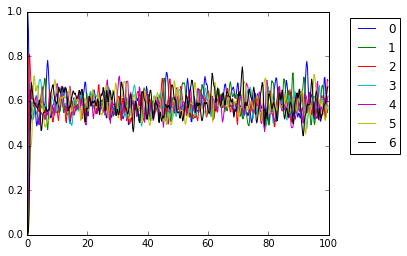

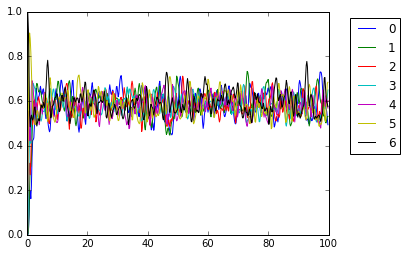

In [33]:
end = (int) (n*100)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

In [35]:
print(np.shape(weightback7))
print(np.average(weightfore7[:,25:]))
print(np.average(weightback7[:,25:]))
print(np.average(weightfore7[:,100:]))
print(np.average(weightback7[:,100:]))

(7, 500)
0.585596759009
0.585390207674
0.58507909996
0.585264861427


# 9-Site
### Z Operator

In [4]:
L = 9
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore9, weightback9 = hm.get_all_weights(L, end, n, here=False, dense = False)

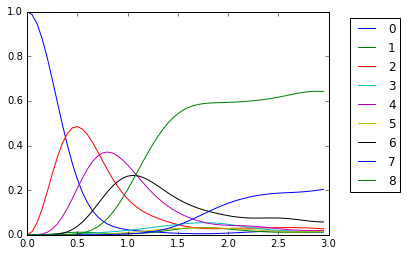

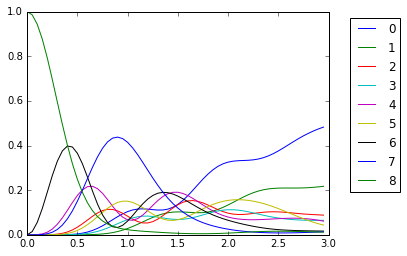

In [5]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

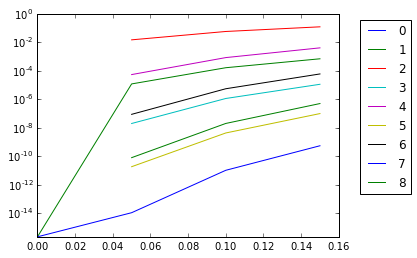

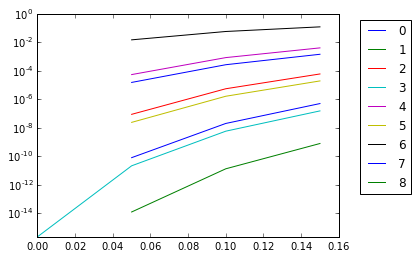

In [6]:
ax = plt.subplot(111)
for i in range(L):
    ax.semilogy(np.arange(N)[:4]/n,weightfore9[i][:4], label = str(i))
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    plt.semilogy(np.arange(N)[:4]/n,weightback9[i][:4], label = str(i))
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

### Weight at site

In [4]:
L = 9
# Total time elapsed
end = 20
# Time steps per second
n = 5

weightfore9, weightback9 = hm.get_all_weights(L, end, n, here=True, dense = False)

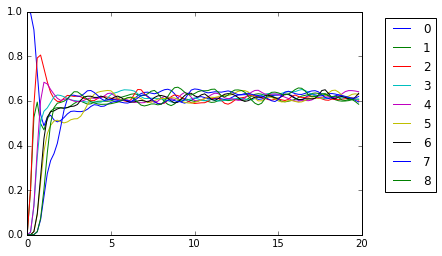

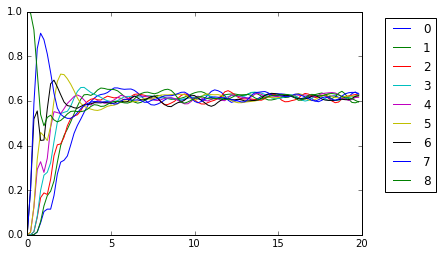

In [5]:
end = (int) (n*20)

for i in range(L):
    plt.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

for i in range(L):
    plt.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

In [23]:
print(np.shape(weightback9))
print(np.average(weightfore9[:,25:]))
print(np.average(weightback9[:,25:]))
print(np.average(weightfore9[:,50:]))
print(np.average(weightback9[:,50:]))

(9, 100)
0.616187733439
0.615157901289
0.618561314075
0.616570008503


# 11-Site

In [41]:
L = 11
# Total time elapsed
end = 50
# Time steps per second
n = 1

weightfore7, weightback7 = hm.get_all_weights(L, end, n, here=True, dense = False)

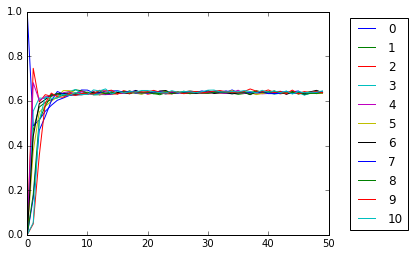

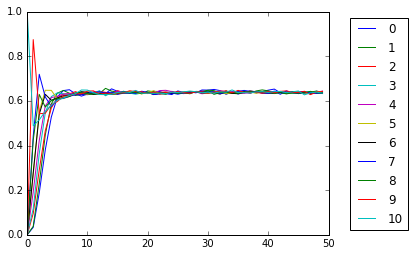

In [43]:
end = (int) (n*50)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

In [46]:
print(np.shape(weightback7))
print(np.average(weightfore7[:,25:]))
print(np.average(weightback7[:,25:]))
print(np.average(weightfore7[:,30:]))
print(np.average(weightback7[:,30:]))

(11, 50)
0.637819072868
0.638399776642
0.637775638988
0.638434868322
